<b>Запустите ячейку ниже</b>
<h1>Описание</h1>
<h2>В ячейке ниже создаётся класс для обработки и очистки набора данных.</h2>

In [ ]:
import os
import logging
import string
import math
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

try:
    nltk.find("stopwords")
except LookupError:
    nltk.download("stopwords")

try:
    nltk.find("wordnet")
except LookupError:
    nltk.download("wordnet")

try:
    nltk.find("punkt")
except LookupError:
    nltk.download('punkt')


class DSReader:
    """The class DSReader is used to clean up the dataset and break the dataset down
    into test and training data. The main use is to clean up the dataset from "trash"
    Attributes
    ----------
    patch : str
        full path to the dataset
    dataset : DataFrame
        dataset
    dictionary : list[str]
        list of all words in the dataset
    Methods
    -------
    load_dataset(path)
        reads a file with a dataset
    remove_digits()
        removes all digits from the dataset
    to_lower()
        returns a dataset in lowercase
    remove_punctuation_marks()
        returns a dataset without punctuation marks
    remove_stopwords()
        returns a dataset without stopwords
    remove_duplicates()
        returns a dataset without duplicate data
    make_dictionary()
        returns a list consisting of all the words in the dataset
    vectorize()
        returns two lists: a list of email texts and a list of labels
    split_train_and_test(list_email: list[str], list_label: list[int])
        return tuple of train and test data
    no_stopwords()
        return string without stopwords
    no_punctuation()
        return string without punctuation marks
    no_digits()
        return string without digits
    dataset_cleaning()
        Performs all methods of cleaning the dataset
        return clean dataset
    tokenize(text)
        ???
    """

    LOG_FORMAT = "%(levelname)s %(asctime)s, %(funcName)s - %(message)s"
    logging.basicConfig(filename=os.path.abspath('logs/logging_file.log'),
                        level=logging.DEBUG,
                        format=LOG_FORMAT,
                        filemode='w')

    def __init__(self, patch):
        self.patch = patch
        self.dataset = DSReader.load_dataset(self.patch)
        self.dictionary = []

        logging.debug('INITIAL\npath: %s,'
                      '\ndataset: %s,'
                      '\ndictionary: %s', self.patch, self.dataset, self.dictionary)

    @staticmethod
    def dataset_cleaning(obj):
        """Use all methods for cleaning the dataset"""
        obj.to_lower()
        obj.remove_digits()
        obj.remove_punctuation_marks()
        obj.remove_duplicates()
        obj.remove_stopwords()

    @staticmethod
    def str_cleaning(inp_str):
        """Use all methods for cleaning the input string"""
        inp_str = inp_str.lower()
        inp_str = DSReader.no_digits(inp_str)
        inp_str = DSReader.no_punctuation(inp_str)
        inp_str = DSReader.no_stopwords(inp_str)
        return inp_str

    @staticmethod
    def tokenize(text):
        """  ???  """
        url_regex = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|' \
                    r'[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
        detected_urls = re.findall(url_regex, text)
        for url in detected_urls:
            text = text.replace(url, "urlplaceholder")

        tokens = word_tokenize(text)
        lemmatizer = WordNetLemmatizer()

        clean_tokens = []
        for tok in tokens:
            clean_tok = lemmatizer.lemmatize(tok).lower().strip()
            clean_tokens.append(clean_tok)

        return clean_tokens

    @staticmethod
    def no_stopwords(inp_str):

        stop_words = tuple(nltk.corpus.stopwords.words('english'))
        words = nltk.word_tokenize(str(inp_str))
        new_list_str = ' '.join(words)
        words = (new_list_str.lower()).split()

        without_stop_words = [word.lower() for word in words
                              if word not in stop_words]
        without_short_words = [x for x in without_stop_words
                               if len(x) > 2]
        new_str = ' '.join(without_short_words)
        return new_str

    @staticmethod
    def no_punctuation(inp_str):
        """Method for remove punctuation marks from a string"""
        punctuation_string = string.punctuation + '—–'
        no_punctuation_str = ""
        for char in str(inp_str):
            if char not in punctuation_string and char in string.ascii_letters:
                no_punctuation_str = no_punctuation_str + char
            else:
                no_punctuation_str = no_punctuation_str + ' '
        return no_punctuation_str

    @staticmethod
    def no_digits(inp_str):
        """Method for remove digits from a string"""
        no_digits_str = ''
        for char in str(inp_str):
            if char not in string.digits and char in string.ascii_letters:
                no_digits_str = no_digits_str + char
            else:
                no_digits_str = no_digits_str + ' '
        return no_digits_str

    @staticmethod
    def load_dataset(path):
        """Method for loading a dataset
        Parameters
        ----------
        path : str
            full path to the dataset
        """

        logging.info('Starting the load_dataset method')
        logging.debug('INPUT DATA:\nDataset path: %s', path)

        data_frame_csv = pd.read_csv(path)

        logging.info('Dataset successful loaded!')
        logging.debug('Dataset:\n%s', data_frame_csv)
        return data_frame_csv

    def remove_digits(self):
        """Method for remove digits from a dataset"""

        logging.info('Starting the remove_digits method')

        self.dataset['email'] = self.dataset['email'].map(DSReader.no_digits)

        logging.info('Digits successful removed from dataset!')
        logging.debug('Dataset:\n%s', self.dataset)
        return self.dataset

    def to_lower(self):
        """Method for converting a dataset to lowercase"""

        logging.info('Starting the to_lower method')

        self.dataset['email'] = self.dataset['email'].str.lower()

        logging.info('The dataset is successfully converted to lowercase!')
        logging.debug('Dataset:\n%s', self.dataset)
        return self.dataset

    def remove_punctuation_marks(self):
        """Method for remove punctuation marks from a dataset"""

        logging.info('Starting the remove_punctuation_marks method')

        self.dataset['email'] = self.dataset['email'].map(DSReader.no_punctuation)

        logging.info('Punctuation marks successful removed from dataset!')
        logging.debug('Dataset:\n%s', self.dataset)
        return self.dataset

    def remove_stopwords(self):
        """Method for remove stopwords from a dataset"""

        logging.info('Starting the remove_stopwords method')

        self.dataset['email'] = self.dataset['email'].map(DSReader.no_stopwords)

        logging.info('Stopwords successful removed from dataset!')
        logging.debug('Dataset:\n%s', self.dataset)
        return self.dataset

    def remove_duplicates(self):
        """Method for remove duplicates from a dataset"""

        logging.info('Starting the remove_duplicates method!')
        self.dataset = pd.DataFrame.drop_duplicates(self.dataset)

        logging.info('Duplicates successful removed from dataset!')
        logging.debug('Dataset:\n%s', self.dataset)
        return self.dataset

    def make_dictionary(self):
        """Method for creating a list of all words in a dataset"""

        logging.info('Starting the make_dictionary method!')

        list_words = []
        email_index = self.dataset.index

        for i in email_index:
            list_words.extend(self.dataset['email'][i].split())

        self.dictionary = list(set(list_words))

        logging.info('Dictionary successful created!')
        return self.dictionary

    def vectorize(self):
        """Method for creating lists of emails and labels"""

        logging.info('Starting the vectorize method!')

        emails = pd.DataFrame(self.dataset['email']).values
        emails_labels = pd.Series(self.dataset['label']).values

        logging.info('Dataset successful splitted(vectorize)!')
        return emails, emails_labels

    @staticmethod
    def split_train_and_test(list_email, list_label, percent=0.7):
        """Method for splitting data into training and test data
        Parameters
        ----------
        list_email: list[str]
            a list consisting of email texts
        list_label: list[int]
            a list consisting of email labels
        percent: float
            a percent of train data
        """
        if (len(list_email) & len(list_label)) <= 0 or percent <= 0:
            raise Exception

        logging.info('Starting the split_train_and_test method!')

        train_count = math.floor(list_email.size * percent)

        train_labels = list_label[:train_count]
        test_labels = list_label[train_count:]

        train_emails = list_email[:train_count]
        test_emails = list_email[train_count:]

        logging.info('Dataset successful splitted!')
        return train_emails, train_labels, test_emails, test_labels

<h4>!!! ВНИМАНИЕ ЗАПУСК ЯЧЕЙКИ НИЖЕ МОЖЕТ ЗАНЯТЬ БОЛЬШОЕ КОЛИЧЕСТВО ВРЕМЕНИ, ТАК КАК ПРОИСХОДИТ ОБУЧЕНИЕ И ОЦЕНКА СРАЗУ 9 МОДЕЛЕЙ !!!</h4>

<h3>Результаты выполнения данного кода можно посмотреть в таблице ниже не запуская ячейку.</h3>

In [ ]:
"""evaluate models scores"""
import sys
import nltk
import os
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

dataset_path = os.path.abspath("../input/emails/emails.csv")


def load_data():
    """Method for data loading"""
    df = DSReader(dataset_path)
    DSReader.dataset_cleaning(df)
    X, y = df.vectorize()
    return X, y


def display_results(y_test, y_pred):
    """Method for display model score"""
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)


X, y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

clf_list = {'RandomForestClassifier1 + tfidf': RandomForestClassifier(random_state=1),
            'RandomForestClassifier1 + tfidf - tokenizer': RandomForestClassifier(random_state=1),
            'RandomForestClassifier2 + chi': RandomForestClassifier(random_state=1),
            'MultinomialNB1': MultinomialNB(),
            'MultinomialNB2 + tfidf': MultinomialNB(),
            'MultinomialNB3 - tokenizer': MultinomialNB(),
            'MultinomialNB4 + tfidf - tokenizer': MultinomialNB(),
            'SGDClassifier1 + chi': SGDClassifier(loss='hinge', penalty='l2',
                                                  alpha=1e-3, random_state=1),
            'SGDClassifier2 + tfidf': SGDClassifier(loss='hinge', penalty='l2',
                                                    alpha=1e-3, random_state=1)}

models_score = pd.DataFrame(columns=['model', 'accuracy', 'precision', 'recall', 'F1-score'],
                            index=range(1, len(clf_list)+1))

index = 1
for clf in clf_list:
    print(f"step {index} out of {len(clf_list)}")
    if clf == 'MultinomialNB1':
        pipeline = Pipeline([('vect', CountVectorizer(tokenizer=DSReader.tokenize)),
                             ('clf', clf_list[clf])])
    elif clf == 'MultinomialNB2 + tfidf':
        pipeline = Pipeline([('vect', CountVectorizer(tokenizer=DSReader.tokenize)),
                             ('tfidf', TfidfTransformer()),
                             ('clf', clf_list[clf])])
    elif clf == 'MultinomialNB3 - tokenizer':
        pipeline = Pipeline([('vect', CountVectorizer()),
                             ('clf', clf_list[clf])])
    elif clf == 'MultinomialNB4 + tfidf - tokenizer':
        pipeline = Pipeline([('vect', CountVectorizer()),
                             ('tfidf', TfidfTransformer()),
                             ('clf', clf_list[clf])])
    elif clf == 'SGDClassifier1 + chi':
        pipeline = Pipeline([('vect', CountVectorizer(tokenizer=DSReader.tokenize)),
                             ('chi', SelectKBest(chi2, k=12000)),
                             ('clf', clf_list[clf])])
    elif clf == 'RandomForestClassifier2 + chi':
        pipeline = Pipeline([('vect', CountVectorizer(tokenizer=DSReader.tokenize)),
                             ('chi', SelectKBest(chi2, k=12000)),
                             ('clf', clf_list[clf])])
    elif clf == 'RandomForestClassifier1 + tfidf - tokenizer':
        pipeline = Pipeline([('vect', CountVectorizer()),
                             ('chi', SelectKBest(chi2, k=12000)),
                             ('clf', clf_list[clf])])
    else:
        pipeline = Pipeline([('vect', CountVectorizer(tokenizer=DSReader.tokenize)),
                             ('tfidf', TfidfTransformer()),
                             ('clf', clf_list[clf])])

    CVS_accuracy = cross_val_score(pipeline, X.ravel(), y, scoring='accuracy')
    CVS_precision = cross_val_score(pipeline, X.ravel(), y, scoring='precision')
    CVS_recall = cross_val_score(pipeline, X.ravel(), y, scoring='recall')

    accuracy = round(CVS_accuracy.mean(), 3)
    precision = round(CVS_precision.mean(), 3)
    recall = round(CVS_recall.mean(), 3)
    f1_score = round(2 * (precision * recall) / (precision + recall), 3)

    # train classifier
    pipeline.fit(X_train.ravel(), y_train)

    # predict on test data
    y_pred = pipeline.predict(X_test.ravel())

    # display results
    display_results(y_test, y_pred)

    models_score.loc[index, 'model'] = str(clf)
    models_score.loc[index, 'accuracy'] = accuracy
    models_score.loc[index, 'precision'] = precision
    models_score.loc[index, 'recall'] = recall
    models_score.loc[index, 'F1-score'] = f1_score

    index = index + 1

models_score = models_score.sort_values(by=['F1-score', 'precision'], ascending=False)

html_str = (models_score.to_html()).replace('\n', '')

with open(os.path.abspath('./scores_table_html.txt'), 'w') as outfile:
    outfile.write(html_str)


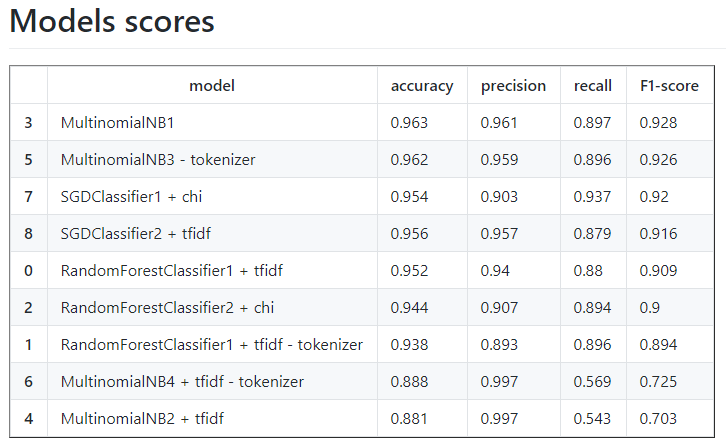

Данная таблица была получена с помощью пяти слойной кроссвалидации.

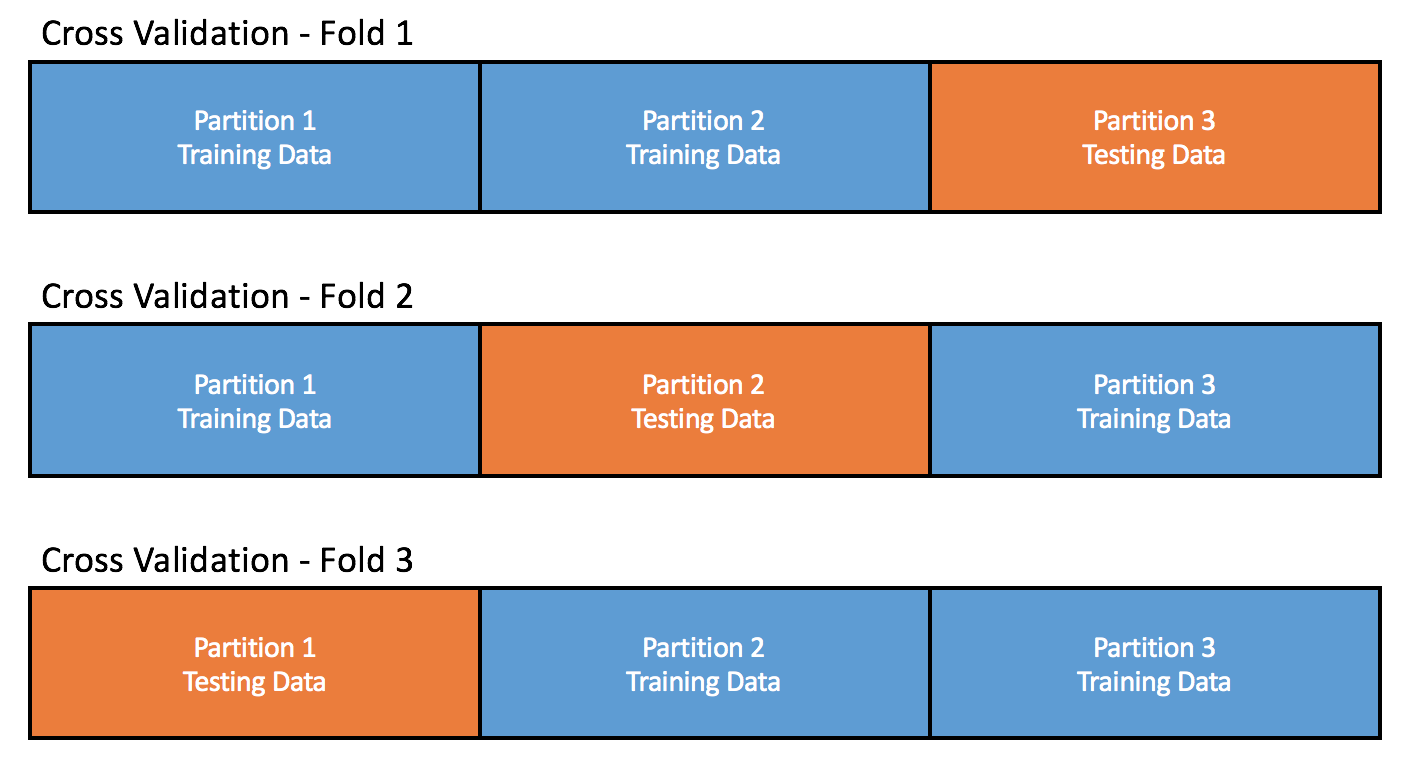

<h4>Запустите ячейку ниже для обучения модели классификации (данный процесс может занять от 2 до 5 минут).</h4>

<h4>В случае возникновения ошибки: NameError: name 'DSReader' is not defined, необходимо перезапустить первую ячейку.</h4>

In [ ]:
"""Email classifier"""
import os.path
import sys
from joblib import dump
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer


dataset_path = os.path.abspath("../input/emails/emails.csv")

try:
    emails_data = DSReader(dataset_path)
except FileNotFoundError:
    print("Dataset not found.")

print("Please wait model fitting.")

DSReader.dataset_cleaning(emails_data)

X, y = emails_data.vectorize()

pipeline = Pipeline([('vect', CountVectorizer(tokenizer=DSReader.tokenize)),
                     ('clf', MultinomialNB())])

pipeline.fit(X.ravel(), y)

print('Fit process successful ending!\n')

email_text = input('Paste your email text:\n')
while email_text != 'EXIT':
    logging.debug('Email text:\n%s', email_text)

    email_text = DSReader.str_cleaning(email_text)

    predict = pipeline.predict([email_text])

    print("\n\nI think this is SPAM" if predict == [1] else "I think this is NOT SPAM")
    email_text = input('If you want exit please write: '
                       'EXIT or write new email text and continue:\n')

Скачать полный код проекта можно по ссылке https://github.com/awilliamson1889/Simple-SPAM-classificator

<h3>Как работает наивный байс классификатор?</h3>

<h4>Давайте рассмотрим, что у нас есть полные 12 электронных писем. 8 из которых не являются спамом и оставшиеся 4 – спам.</h4>


Количество не спама электронные письма – 8
Количество спам-электронных писем – 4
Всего писем – 12

Предположим, весь корпус содержит всего четыре слова **(Друг, предложение, деньги, замечательный)**

На картинке ниже показана частота встречаемости слов в письмах.
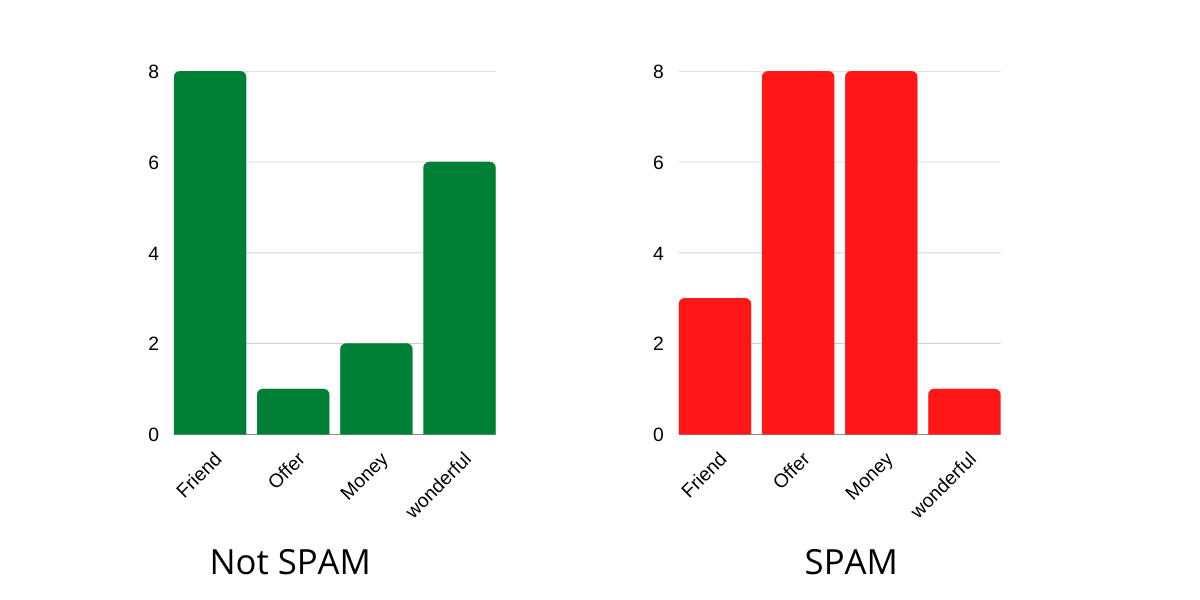


Потом алгоритм рассчитывает вероятность встретит то или иное слов в письме.
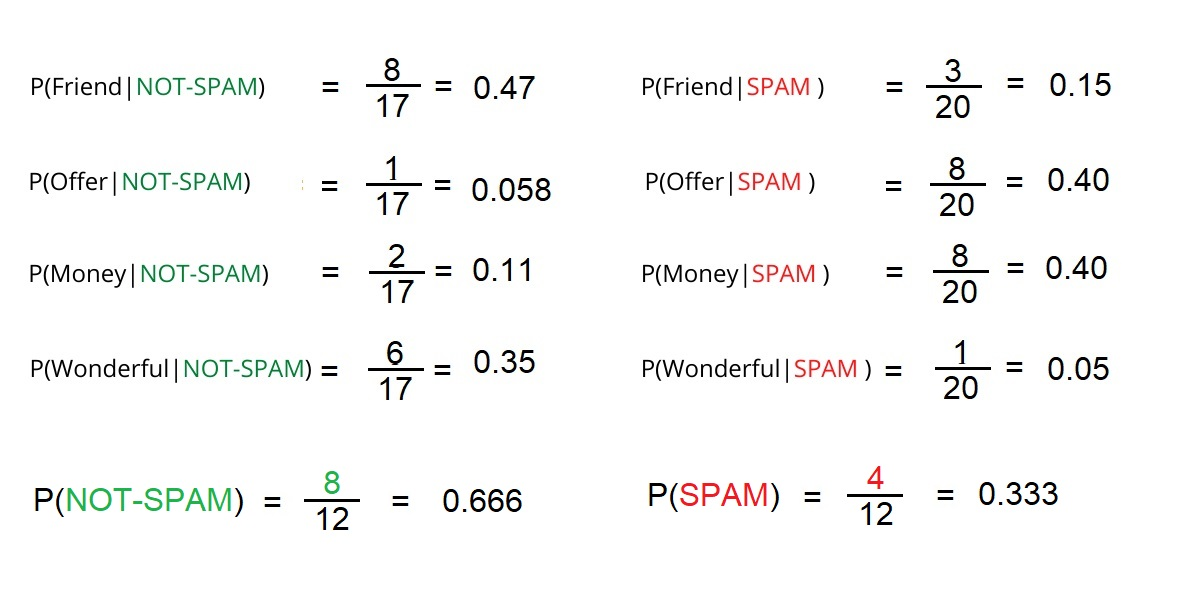


Теперь, когда у нас есть все предыдущие и условные вероятности, мы можем нанести ему теорему Bayes.

Предположим, мы получим электронное письмо: « предложить деньги» И на основе наших ранее рассчитанных вероятностей нам нужно классифицировать его как спам или не-спам.

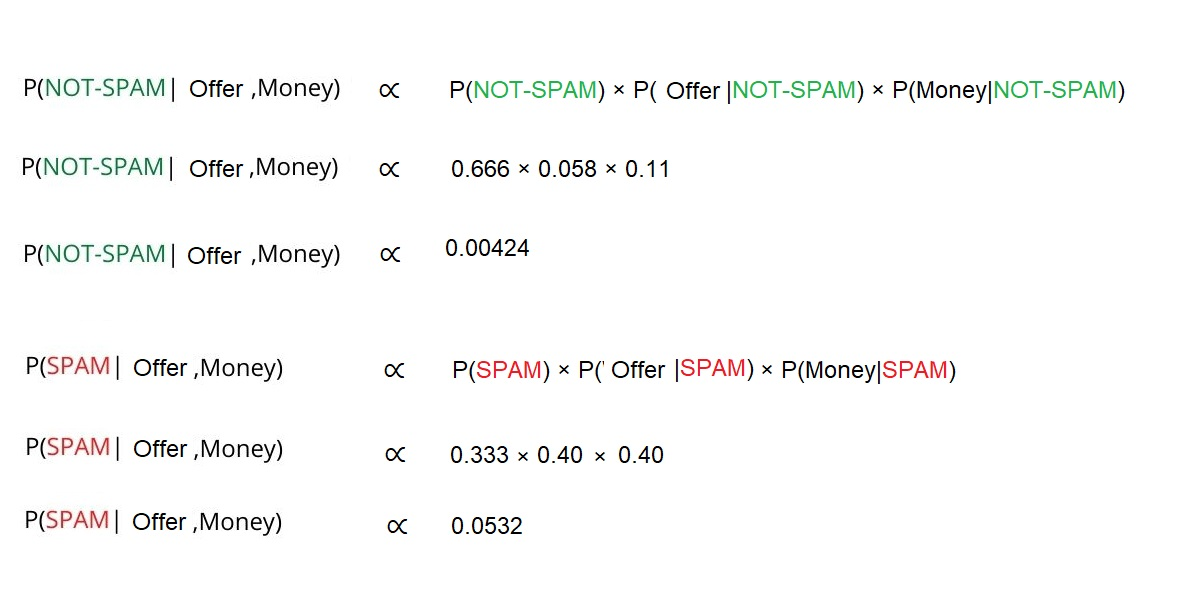

Вероятность электронного письма будет спамом, учитываемым словами, и деньги больше, чем вероятность того, что почта не является спамом. (0,0532> 0,00424).

